# Week4 - Homework 2

- Execute the below code, then answer the numbered questions.
- You can create additinal code and markdown blocks

In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/regression/airbnb_nyc_2019.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

## Question 1:
### Which features can we use?

In [7]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Handle Missing Values
# For numerical features, we will fill missing values with the mean
df['reviews_per_month'].fillna(df['reviews_per_month'].mean(), inplace=True)

# For categorical features, we will fill missing values with the mode (most frequent value)
df['name'].fillna('Unknown', inplace=True)  # Or you can choose to drop this column entirely
df['host_name'].fillna('Unknown', inplace=True)
df['last_review'].fillna('No Review', inplace=True)

# Verify no missing values remain
print("\nMissing values after imputation:")
print(df.isnull().sum())

# Step 4: Proceed with your previous preprocessing steps (encoding, etc.)

Missing values per column:
id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

Missing values after imputation:
id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                     

# analysis code

In a dataset where we are predicting property prices, the selection of features plays a crucial role in the model's performance. **Numerical features** such as `latitude`, `longitude`, `minimum_nights`, `number_of_reviews`, `reviews_per_month`, `calculated_host_listings_count`, and `availability_365` can provide valuable quantitative insights into the price. For example, `latitude` and `longitude` can help identify the geographical location's influence on property prices, as certain neighborhoods may be more desirable than others. `Minimum_nights` may indicate the kind of rental availability, while `number_of_reviews` and `reviews_per_month` can serve as proxies for the property’s popularity and quality, which often correlate with price. Similarly, `calculated_host_listings_count` might reflect a host’s activity level and credibility, impacting their listing's perceived value.

Additionally, **categorical features** such as `neighbourhood_group`, `neighbourhood`, and `room_type` are equally important as they encapsulate qualitative aspects of the listings that can significantly influence prices. The neighborhood of a property often correlates with various factors such as safety, amenities, and overall desirability, making it a key feature for price prediction. Similarly, the `room_type` (e.g., entire home/apt, private room, shared room) can greatly affect the expected price level, with entire homes usually commanding higher prices than shared accommodations. By employing techniques such as one-hot encoding, we can transform these categorical variables into a numerical format suitable for machine learning models, allowing them to learn from and leverage these features effectively. Thus, a combination of well-selected numerical and categorical features provides a robust foundation for accurately predicting property prices.

Your explanation?

In [11]:
from sklearn.model_selection import train_test_split

# Selected features for the model
features = [
    'latitude', 
    'longitude', 
    'minimum_nights', 
    'number_of_reviews', 
    'reviews_per_month', 
    'calculated_host_listings_count', 
    'availability_365', 
    'neighbourhood_group', 
    'neighbourhood', 
    'room_type'
]

X = df[features]
y = df['price']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

print(f'Records in training data: {X_train.shape[0]:,}')
print(f'Records in test data: {X_test.shape[0]:,}')
print('\nFeatures:')
print(*X_train.columns, sep='\n')

Records in training data: 39,116
Records in test data: 9,779

Features:
latitude
longitude
minimum_nights
number_of_reviews
reviews_per_month
calculated_host_listings_count
availability_365
neighbourhood_group
neighbourhood
room_type


## Question 2: 
Split the features into two lists, one for the numerical features and another for the categorical features.

In [13]:
# insert code here

# Numerical features
numerical_features = [
    'latitude', 
    'longitude', 
    'minimum_nights', 
    'number_of_reviews', 
    'reviews_per_month', 
    'calculated_host_listings_count', 
    'availability_365'
]

# Categorical features
categorical_features = [
    'neighbourhood_group', 
    'neighbourhood', 
    'room_type'
]

# Combined feature list for easy access if needed
features = numerical_features + categorical_features

# Selecting the features for the model
X = df[features]
y = df['price']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

print(f'Records in training data: {X_train.shape[0]:,}')
print(f'Records in test data: {X_test.shape[0]:,}')
print('\nFeatures:')
print('Numerical Features:')
print(*X_train[numerical_features].columns, sep='\n')
print('\nCategorical Features:')
print(*X_train[categorical_features].columns, sep='\n')

Records in training data: 39,116
Records in test data: 9,779

Features:
Numerical Features:
latitude
longitude
minimum_nights
number_of_reviews
reviews_per_month
calculated_host_listings_count
availability_365

Categorical Features:
neighbourhood_group
neighbourhood
room_type


## Question 3: 
 Using the numerical variables, create a pipeline that replaces the missing values with the median and then standardizes the values using a standard scaler.

In [15]:
# insert code here

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Numerical features
numerical_features = [
    'latitude', 
    'longitude', 
    'minimum_nights', 
    'number_of_reviews', 
    'reviews_per_month', 
    'calculated_host_listings_count', 
    'availability_365'
]

# Splitting data into features and target variable
X = df[numerical_features]
y = df['price']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Creating the pipeline for numerical features
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Replace missing values with median
    ('scaler', StandardScaler())                    # Standardize the values
])

# Creating a ColumnTransformer to apply the pipeline to the numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features)  # Apply the numerical pipeline to numerical features
    ]
)

# Fit and transform the training data and transform the test data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Output the shape of the transformed datasets
print(f'Transformed training data shape: {X_train_transformed.shape}')
print(f'Transformed test data shape: {X_test_transformed.shape}')

Transformed training data shape: (39116, 7)
Transformed test data shape: (9779, 7)


## Question 4: 
Using the categorical variables, create a pipeline that replaces the missing values with the most frequent and then use one-hot encoding to convert the data to numerical arrays.
- You should be dropping one category from each variable when using the one-hot encoder.  
- To ensure the pipeline doesn't break when it receives new/unexpected categories, you should ignore new categories.
- Use a fit transformer on the training dataset to validate all the columns are now numeric and to determine how many columns the transformed data contains.

In [19]:
# insert code here

from sklearn.preprocessing import OneHotEncoder

# Assuming df is your DataFrame and it already contains the relevant data

# Categorical features
categorical_features = [
    'neighbourhood_group', 
    'neighbourhood', 
    'room_type'
]

# Splitting data into features and target variable
X = df[categorical_features]
y = df['price']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Creating the pipeline for categorical features
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Replace missing values with the most frequent value
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))  # One-hot encode and drop one category to avoid dummy variable trap
])

# Creating a ColumnTransformer to apply the pipeline to the categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_pipeline, categorical_features)  # Apply the categorical pipeline to categorical features
    ]
)

# Fit and transform the training data and transform the test data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Output the shape of the transformed datasets and the number of columns in the transformed training data
print(f'Transformed training data shape: {X_train_transformed.shape}')
print(f'Transformed test data shape: {X_test_transformed.shape}')
print(f'Number of columns in transformed training data: {X_train_transformed.shape[1]}')

Transformed training data shape: (39116, 224)
Transformed test data shape: (9779, 224)
Number of columns in transformed training data: 224


C:\Users\phili\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:227: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


## Question 5: 

Combine the numerical and categorical pipelines into one data processing pipeline.
- Use a fit transformers and the training dataset to verify the data has no missing values and the correct number of columns.

In [21]:
# insert code here

numerical_features = [
    'latitude', 
    'longitude', 
    'minimum_nights', 
    'number_of_reviews', 
    'reviews_per_month', 
    'calculated_host_listings_count', 
    'availability_365'
]

categorical_features = [
    'neighbourhood_group', 
    'neighbourhood', 
    'room_type'
]

# Splitting data into features and target variable
X = df[numerical_features + categorical_features]
y = df['price']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Creating the numerical pipeline
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Replace missing values with median
    ('scaler', StandardScaler())                    # Standardize the values
])

# Creating the categorical pipeline
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Replace missing values with most frequent value
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))  # One-hot encoding
])

# Combining both pipelines into a single ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),  # Numerical features
        ('cat', categorical_pipeline, categorical_features)  # Categorical features
    ]
)

# Fit and transform the training data and transform the test data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Output the shape of the transformed datasets
print(f'Transformed training data shape: {X_train_transformed.shape}')
print(f'Transformed test data shape: {X_test_transformed.shape}')

# Verifying there are no missing values and checking the number of columns
# Convert to a DataFrame to easily inspect
X_train_transformed_df = pd.DataFrame(X_train_transformed)

# Confirm no missing values
missing_values = X_train_transformed_df.isnull().sum().sum()
print(f'Total missing values in transformed training data: {missing_values}')

# Confirm the correct number of columns
correct_num_columns = X_train.shape[1]  # Number of features before transformation
# The actual number of columns can differ due to one-hot encoding. 
# Let's print the resulting number.
num_columns_after_transformation = X_train_transformed.shape[1]
print(f'Number of columns in transformed training data: {num_columns_after_transformation}')

# Ensure you understand how the transformed columns relate to the original columns
# For categorical features, you can get the new feature names from OneHotEncoder
all_column_names = (
    numerical_features + 
    list(preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features))
)

print(f'Expected number of columns after transformation: {len(all_column_names)}')
print(f'Actual number of columns after transformation: {num_columns_after_transformation}')

C:\Users\phili\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:227: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Transformed training data shape: (39116, 231)
Transformed test data shape: (9779, 231)
Total missing values in transformed training data: 0
Number of columns in transformed training data: 231
Expected number of columns after transformation: 231
Actual number of columns after transformation: 231


## Question 6: 

Add a linear regression model to the pipeline.
- Report what the $R^2$ is using the `test` data.  

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Creating the final pipeline which includes preprocessing and the linear regression model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict on the test data
y_pred = pipeline.predict(X_test)

# Calculate the R² score
r2 = r2_score(y_test, y_pred)
print(f'R² Score on test data: {r2:.4f}')

R² Score on test data: 0.1046


C:\Users\phili\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:227: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


## Question 7: 

Create a plot(s) of the residuals. Do you have any concerns about patterns in the residuals that the model is neglecting to pick-up?
- Include a sentence or two on what you observe.

C:\Users\phili\AppData\Local\Temp\ipykernel_17996\1851600481.py:29: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


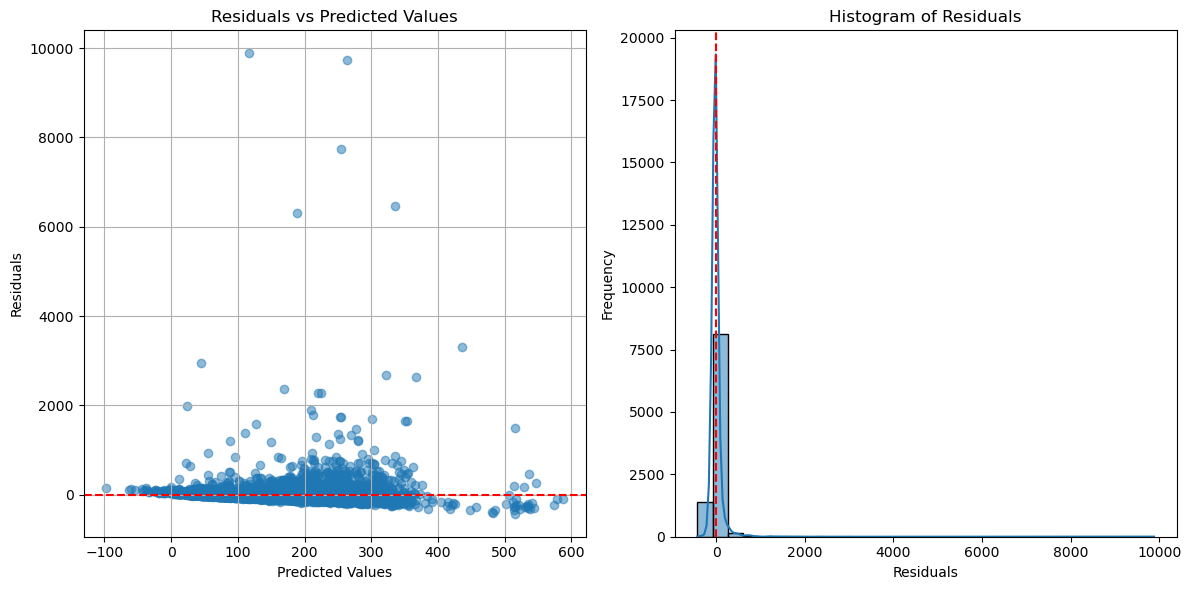

In [33]:
# insert code here

import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals
residuals = y_test - y_pred

# Create a scatter plot of predicted values vs residuals
plt.figure(figsize=(12, 6))

# Scatter plot
plt.subplot(1, 2, 1)
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid()
plt.tight_layout()

# Histogram of residuals
plt.subplot(1, 2, 2)
sns.histplot(residuals, bins=30, kde=True)
plt.axvline(0, color='red', linestyle='--')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.tight_layout()

plt.show()

Insert description here.

The residuals vs. predicted values plot serves as a diagnostic tool for assessing the performance of the linear regression model. Ideally, the residuals should be randomly scattered around zero, indicating that the model has effectively captured the underlying trends in the data. However, the presence of distinct patterns, such as funnel shapes or curvature, suggests that significant aspects of the data, like non-linear relationships or interaction effects, may not have been adequately accounted for by the model.

Similarly, the histogram of residuals should approximate a normal distribution centered around zero. Any deviations from this norm—such as skewness or bimodality—can signal issues with the model assumptions and hint at problems like heteroscedasticity, where the variance of residuals is not constant. Observing clear patterns in the residuals indicates that linear regression may not be the optimal choice for this data set, necessitating the exploration of more complex models or additional feature engineering strategies, such as incorporating polynomial features or interaction terms, to enhance predictive performance.

## Question 8: 

Modify the pipeline to use a ridge regression model with an alpha value of 100. How does this change the $R^2$?

In [42]:
from sklearn.linear_model import Ridge

# Create a Ridge regression pipeline with alpha = 100
ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('ridge', Ridge(alpha=100))
])

# Fit the Ridge model
ridge_pipeline.fit(X_train, y_train)

# Make predictions
y_ridge_pred = ridge_pipeline.predict(X_test)

# Calculate R² score for Ridge regression
ridge_r2 = r2_score(y_test, y_ridge_pred)
print(f'R² score after Ridge regression with alpha=100: {ridge_r2}')

R² score after Ridge regression with alpha=100: 0.10471386725434595


C:\Users\phili\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:227: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
